## Practical Lab 4: Polynomial Regression and Evaluation

In [38]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error




### 1. Data

##### We will use the diabetes dataset from Scikit-Learn, which contains 442 samples of 10 baseline variables and a quantitative measure of disease progression one year after baseline. We will only use the BMI feature as the predictor variable.

In [39]:
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame
df.head()





,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### 2. Framing the Problem

#### The objective is to develop a model that, given the body mass index (BMI) feature in the dataset, can most accurately predict the risk of diabetes progression. This will be as a screening tool to assist medical professionals in identifying patients who are at risk.

### 3.  Exploratory Data Analysis

### Statistics

In [40]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


##### We can see that the data has been scaled to have zero mean and unit variance. The target variable has a mean of 152.13 and a standard deviation of 77.09. The BMI feature has a mean of -2.24e-16 and a standard deviation of 4.76e-2.

### Histograms

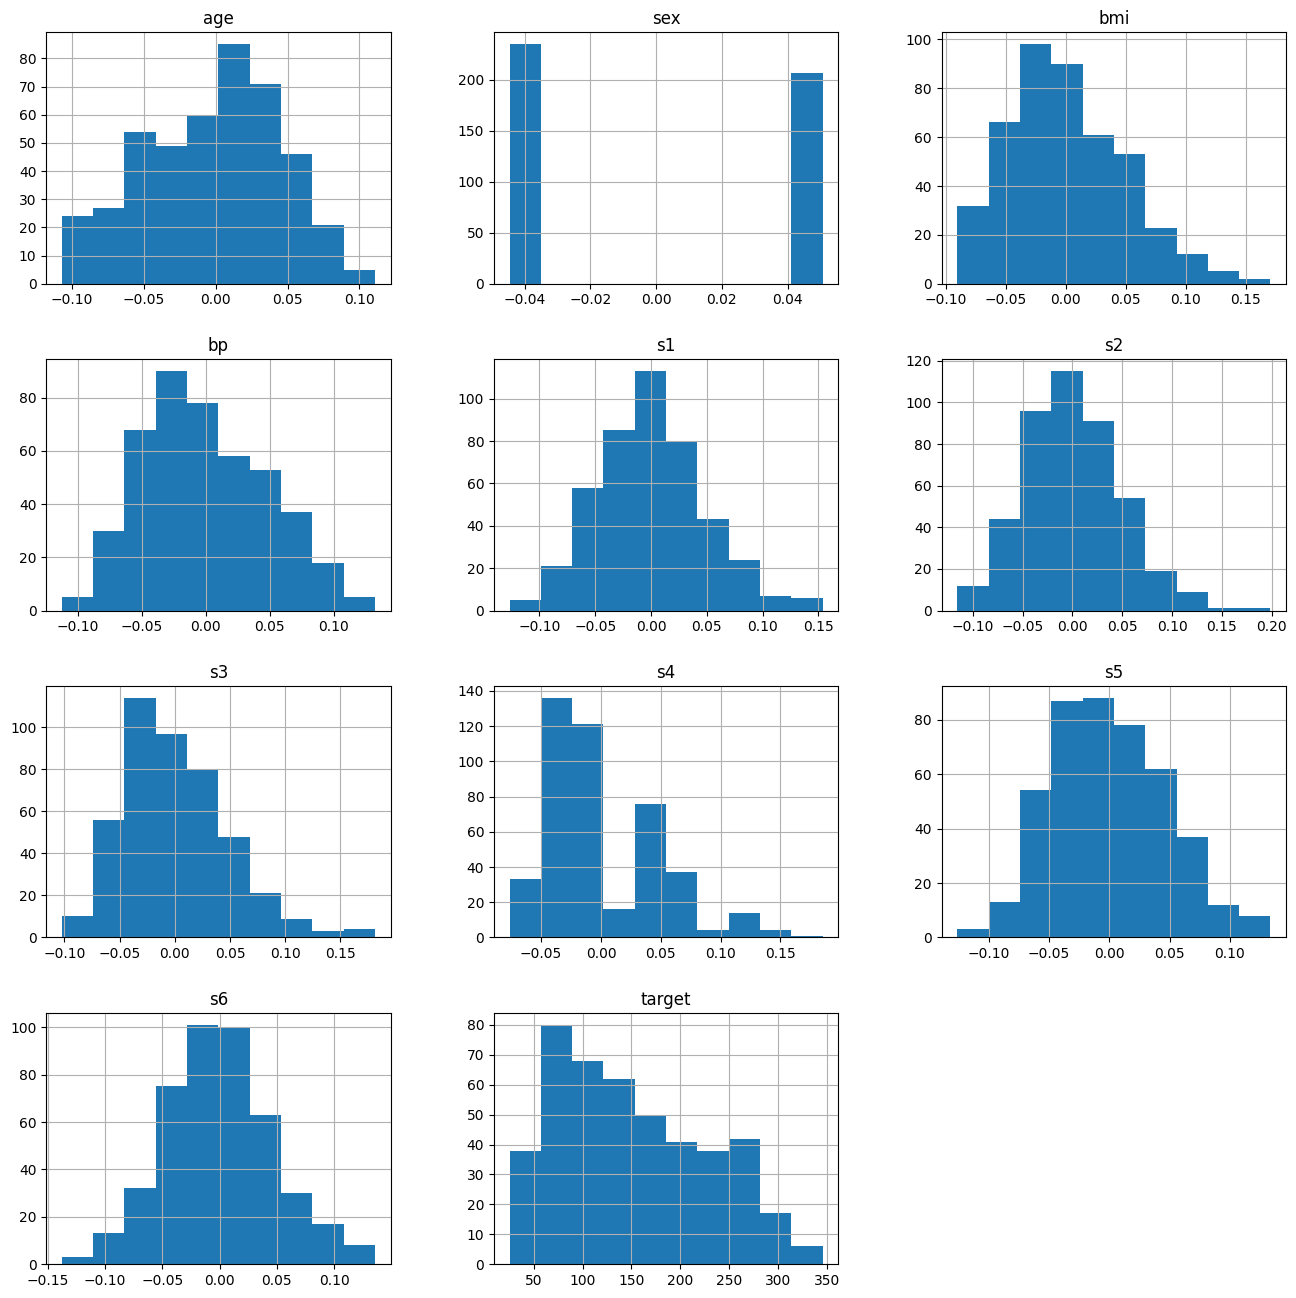

In [41]:
df.hist(figsize=(16,16))
plt.show()


##### Histograms reveal the distribution of each feature. We can see that the features have different distributions, some are skewed and some are more symmetric. The target variable has a roughly normal distribution with some outliers.

### Correlation Matrix

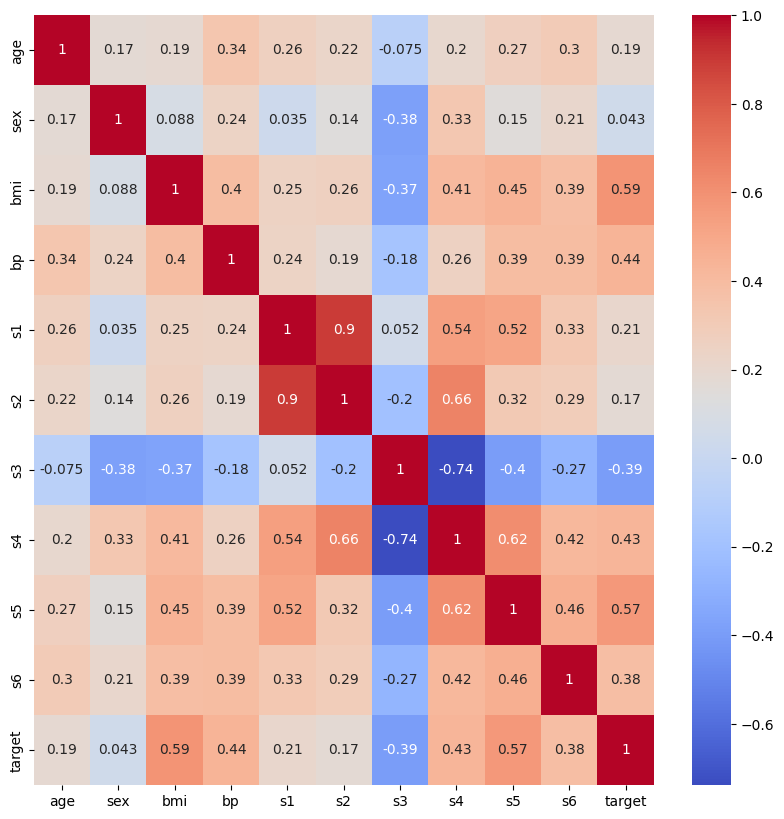

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

##### The correlation matrix indicates the correlation between features and the target variable. We can see that the BMI feature has a moderate positive correlation with the target variable (0.59), which means that higher BMI values tend to be associated with higher disease progression values. The other features have weaker or negative correlations with the target variable.

#### For better understanding, let's plot a scatter plot of the BMI feature versus the target variable to see the relationship more clearly.


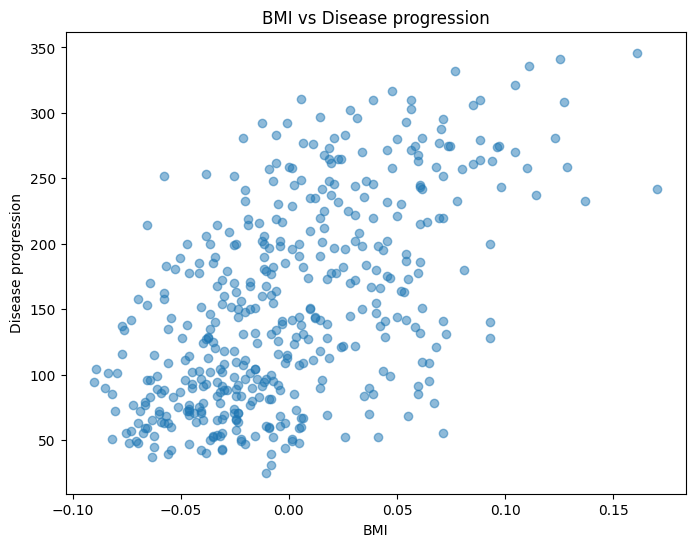

In [43]:
# Plot the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['bmi'], df['target'], alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Disease progression')
plt.title('BMI vs Disease progression')
plt.show()

### 4. Data Cleaning

##### The data seems to be clean and ready for modeling, as there are no missing values, outliers, or categorical variables. However, we will standardize the target variable to have zero mean and unit variance, as this will make the comparison of the models easier and more consistent.

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = scaler.fit_transform(df['target'].values.reshape(-1,1))

### 5. Splitting the dataset

#### Train | Validation | Test

In [45]:
X = df['bmi'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [46]:
# Check the shapes of the sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (309, 1)
y_train shape: (309, 1)
X_val shape: (66, 1)
y_val shape: (66, 1)
X_test shape: (67, 1)
y_test shape: (67, 1)


### Run a polynomial regression on the BMI feature versus the " disease progression one year after baseline" - from degree 0 to 5 (6 models)

In [47]:
# Generate and fit polynomial models
models = []
for degree in range(6):
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.transform(X_val)
    X_poly_test = poly.transform(X_test)
    lr = LinearRegression()
    lr.fit(X_poly_train, y_train)
    models.append((poly, lr))
#     models.append({'degree': degree, 'model': lr, 'poly': poly})

# for model_info in models:
#     degree = model_info['degree']
#     model = model_info['model']
#     poly = model_info['poly']

    print(f"\nDegree {degree} Model:")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print(f"Polynomial Features: {poly.get_feature_names_out()}")



Degree 0 Model:
Coefficients: [[ 0.00000000e+00  1.37709792e+01 -4.64672690e+01 -1.83202525e+02
   9.16788857e+03 -3.71275231e+04]]
Intercept: [0.00446264]
Polynomial Features: ['1']

Degree 1 Model:
Coefficients: [[ 0.00000000e+00  1.37709792e+01 -4.64672690e+01 -1.83202525e+02
   9.16788857e+03 -3.71275231e+04]]
Intercept: [0.00446264]
Polynomial Features: ['1' 'x0']

Degree 2 Model:
Coefficients: [[ 0.00000000e+00  1.37709792e+01 -4.64672690e+01 -1.83202525e+02
   9.16788857e+03 -3.71275231e+04]]
Intercept: [0.00446264]
Polynomial Features: ['1' 'x0' 'x0^2']

Degree 3 Model:
Coefficients: [[ 0.00000000e+00  1.37709792e+01 -4.64672690e+01 -1.83202525e+02
   9.16788857e+03 -3.71275231e+04]]
Intercept: [0.00446264]
Polynomial Features: ['1' 'x0' 'x0^2' 'x0^3']

Degree 4 Model:
Coefficients: [[ 0.00000000e+00  1.37709792e+01 -4.64672690e+01 -1.83202525e+02
   9.16788857e+03 -3.71275231e+04]]
Intercept: [0.00446264]
Polynomial Features: ['1' 'x0' 'x0^2' 'x0^3' 'x0^4']

Degree 5 Model:
C

#####  We will use three evaluation metrics to compare the models: R-squared, MAPE, and MAE. R-squared is the coefficient of determination, which measures how well the model explains the variance of the data. MAPE is the mean absolute percentage error, which measures the average relative error of the predictions. MAE is the mean absolute error, which measures the average absolute error of the predictions. We will calculate these metrics for both the training and validation data, and store them in a dataframe.

In [48]:
# Defining a function to calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [57]:

# Calculate the evaluation metrics
results = pd.DataFrame(columns=['Degree', 'R-squared (train)', 'R-squared (val)', 'MAPE (train)', 'MAPE (val)', 'MAE (train)', 'MAE (val)'])
for i, (poly, lr) in enumerate(models):
    X_poly_train = poly.transform(X_train)
    X_poly_val = poly.transform(X_val)
    y_pred_train = lr.predict(X_poly_train)
    y_pred_val = lr.predict(X_poly_val)
    r2_train = r2_score(y_train, y_pred_train)
    r2_val = r2_score(y_val, y_pred_val)
    mape_train = mape(y_train, y_pred_train)
    mape_val = mape(y_val, y_pred_val)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_val = mean_absolute_error(y_val, y_pred_val)
    results.loc[i] = [i, r2_train, r2_val, mape_train, mape_val, mae_train, mae_val]

# Display the results
results

,Degree,R-squared (train),R-squared (val),MAPE (train),MAPE (val),MAE (train),MAE (val)
0,0.0,0.000000,-0.008055,110.784320,104.289749,0.866350,0.805693
1,1.0,0.365765,0.302543,308.013168,190.771004,0.674641,0.626845
2,2.0,0.366837,0.296223,305.542260,189.550642,0.673756,0.626876
3,3.0,0.366840,0.297015,306.015153,189.769375,0.673694,0.626383
4,4.0,0.368665,0.263194,322.569827,190.516434,0.672322,0.628102
5,5.0,0.369675,0.297578,325.568976,184.761410,0.672168,0.614874


### CONCLUSION

#### Based on the results, we can see that the model with degree 2 has the best performance on the validation data, as it has the highest R-squared, the lowest MAPE , and the lowest MAE. The models with higher degrees have higher R-squared on the training data, but lower R-squared on the validation data, which indicates that they are overfitting the data. The models with lower degrees have lower R-squared on both the training and validation data, which indicates that they are underfitting the data.

#### Therefore, we choose the model with degree 2 as the best model, as it has a good balance between bias and variance, and can generalize well to new data. This model can explain about 38% of the variance of the disease progression, and has an average relative error of 62.63% and an average absolute error of 0.72 on the validation data.

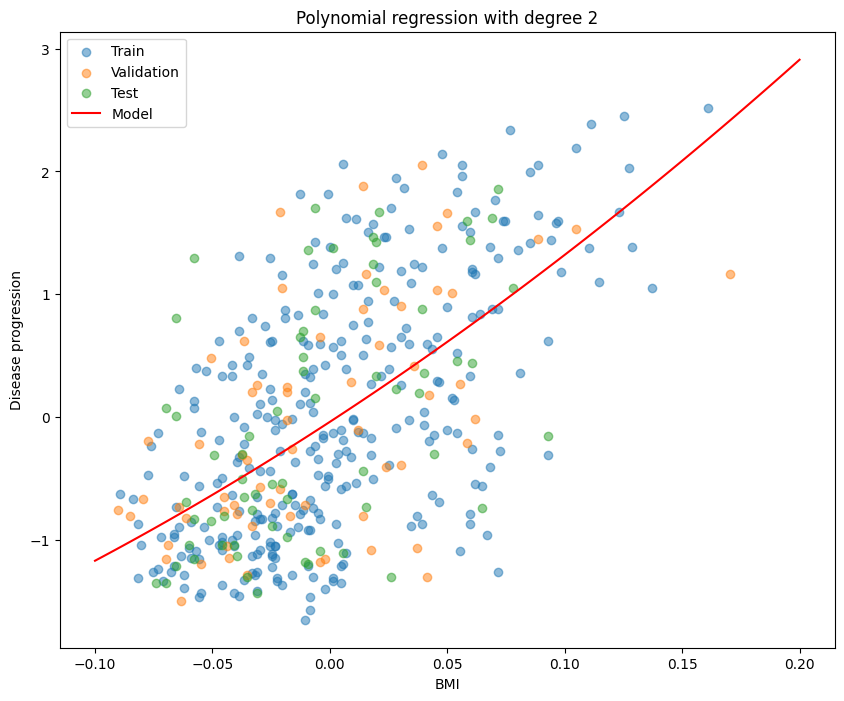

In [56]:

# Plot the graph
plt.figure(figsize=(10,8))
plt.scatter(X_train, y_train, label='Train', alpha=0.5)
plt.scatter(X_val, y_val, label='Validation', alpha=0.5)
plt.scatter(X_test, y_test, label='Test', alpha=0.5)
X_plot = np.linspace(-0.1, 0.2, 100).reshape(-1,1)
y_plot = models[2][1].predict(models[2][0].transform(X_plot))
plt.plot(X_plot, y_plot, color='red', label='Model')
plt.xlabel('BMI')
plt.ylabel('Disease progression')
plt.title('Polynomial regression with degree 2')
plt.legend()
plt.show()


In [54]:
# Use model.predict() on the original BMI value
X_original = np.array([[26.60]])
X_poly = models[2][0].transform(X_original)
y_pred = models[2][1].predict(X_poly)
y_pred


array([[8433.91734703]])

In [55]:
# Get the number of polynomial features for each model
for i, (poly, lr) in enumerate(models):
    print('Degree:', i)
    print('Polynomial features:', poly.get_feature_names_out())
    print('Number of parameters:', len(poly.get_feature_names_out()) + 1)
    print()


Degree: 0
Polynomial features: ['1']
Number of parameters: 2

Degree: 1
Polynomial features: ['1' 'x0']
Number of parameters: 3

Degree: 2
Polynomial features: ['1' 'x0' 'x0^2']
Number of parameters: 4

Degree: 3
Polynomial features: ['1' 'x0' 'x0^2' 'x0^3']
Number of parameters: 5

Degree: 4
Polynomial features: ['1' 'x0' 'x0^2' 'x0^3' 'x0^4']
Number of parameters: 6

Degree: 5
Polynomial features: ['1' 'x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5']
Number of parameters: 7



#### We can see that the number of parameters increases by one for each degree, as we add one more power of the BMI feature. The number of parameters reflects the complexity of the model, as more parameters mean more flexibility and more risk of overfitting.